In [15]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [16]:
# Importing dataset with relevant column names and storing dependent variables in X and dependent variable('MEDV') in y.

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('housing.csv',sep = '\s+',header = None, names = column_names)
X=dataset.iloc[ :, :-1]
y=dataset.iloc[:,13].values

In [17]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [18]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


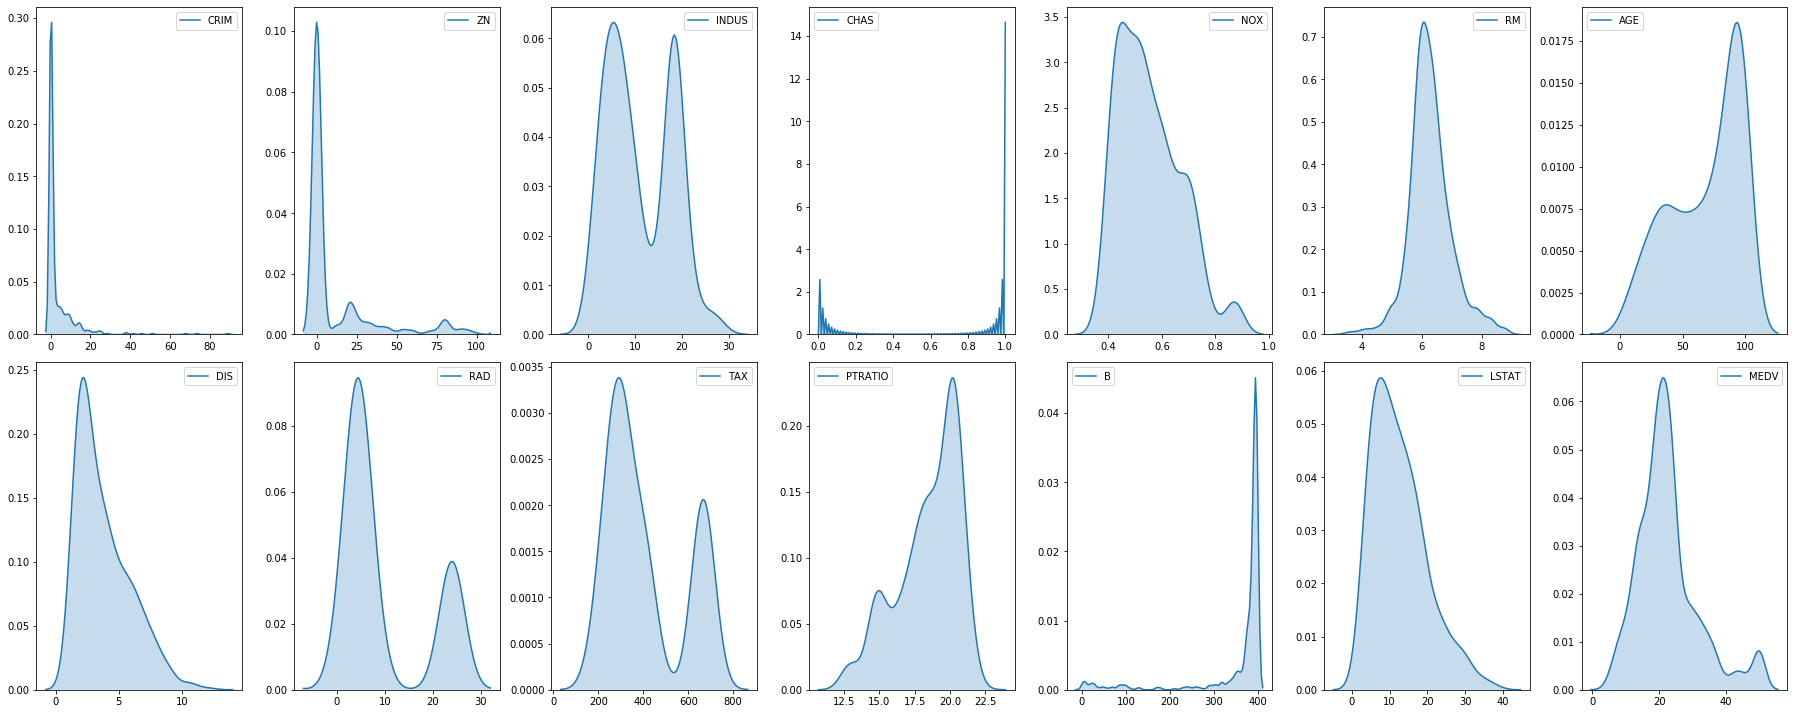

In [19]:
# Distribution plots of all variables

fig,axis = plt.subplots(nrows = 2,ncols = 7,figsize = (25,10))
axis = axis.flatten()
for i in range(14):
    sns.kdeplot(data = dataset.iloc[:,i],ax = axis[i],shade = True)
plt.tight_layout(pad = 1)

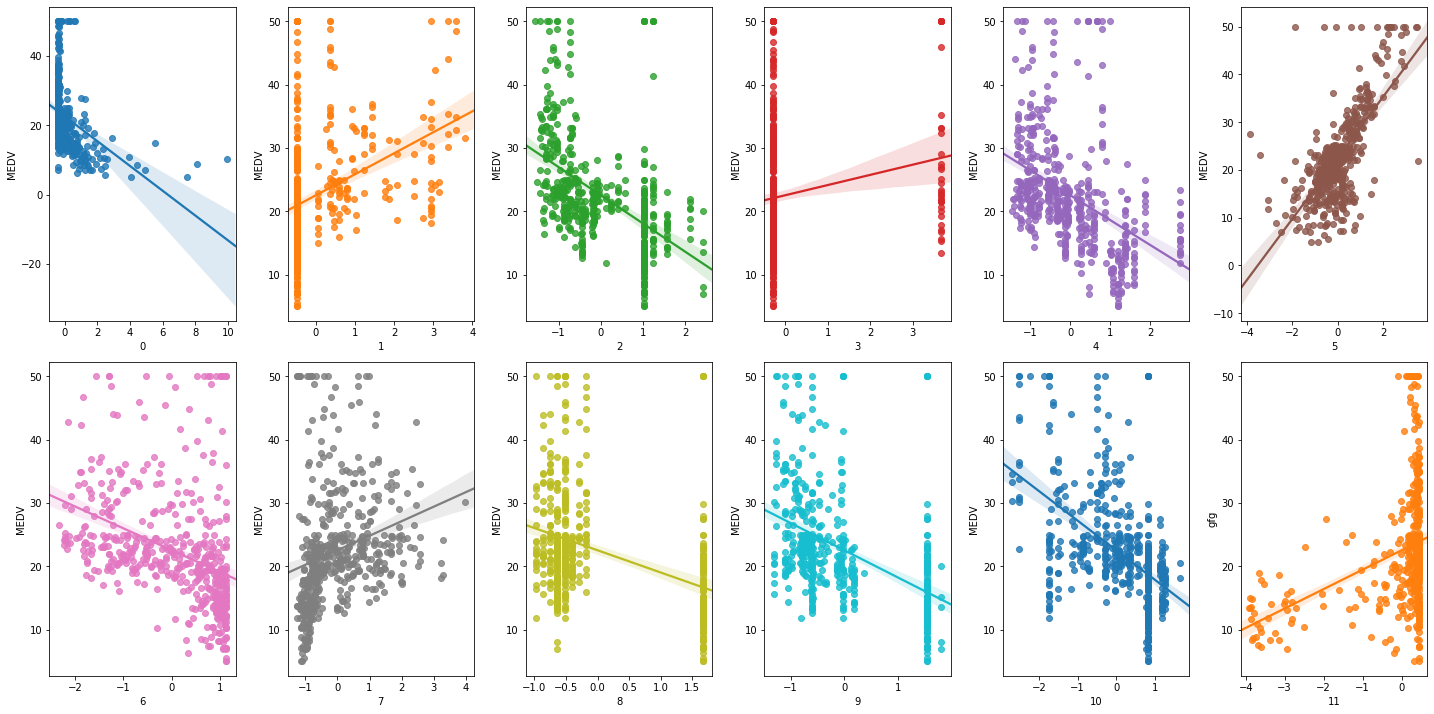

In [20]:
# Plot of dependent variables vs dependent variable(MEDV)

from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler()
X_scaled = pd.DataFrame(scaled_X.fit_transform(X))
fig,axs = plt.subplots(nrows = 2,ncols = 6,figsize = (20,10))
axs = axs.flatten()
for i in range(12):
    sns.regplot(x=X_scaled.iloc[:,i],y=dataset['MEDV'],ax = axs[i],label = 'colu')
    plt.ylabel('gfg')
plt.tight_layout(pad = 1)

In [21]:
# Splitting the dataset 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
# Feature scaling


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [23]:
# Applying PCA and taking the variables explaining more than 2% of the variance. We get 10 such variables.

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

Applying differnt regression techniques and using cross validation to find thier rescpective accuracies. Using grid search(wherever applicable) to find the optimal parameters.

In [24]:
# Linear regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print('MSE for test set: '+ str(mean_squared_error(y_test,y_pred)))
acc = cross_val_score(estimator = regressor,X = X_train,y = y_train,cv = 10 ,scoring = 'neg_mean_squared_error')
print('CV_MSE: ' + str(acc.mean()) + ' +/- ' + str(acc.std()))

MSE for test set: 39.176729419680676
CV_MSE: -23.51541890204233 +/- 9.181238512838538


In [25]:
# Polynomial regression

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly,y_train)
y_pred_poly = regressor_poly.predict(poly_reg.transform(X_test))
print('MSE for test set: '+ str(mean_squared_error(y_test,y_pred_poly)))
acc_poly = cross_val_score(estimator = regressor_poly,X = X_train,y = y_train,cv = 10 ,scoring = 'neg_mean_squared_error')
print('CV_MSE_POLY: ' + str(acc_poly.mean()) + ' +/- ' + str(acc_poly.std()))

MSE for test set: 197423.10740744663
CV_MSE_POLY: -23.51541890204233 +/- 9.181238512838538


In [26]:
#Support vector regression

from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf',C = 100, gamma = 0.2)
'''parameters_svr = [{'C':[0.1,1,10,100],'kernel':['linear']},{'C':[0.1,1,10,100,1000],'kernel':['rbf'],'gamma':[0.2,0.4,0.6,0.8,1]}]
grid_search_svr = GridSearchCV(estimator = regressor_svr,param_grid = parameters_svr,scoring = 'neg_mean_squared_error',cv = 10)
grid_search_svr.fit(X_train,y_train)
grid_search_svr.best_params_'''
regressor_svr.fit(X_train,y_train)
y_pred_svr = regressor_svr.predict(X_test)
print('MSE for test set: '+ str(mean_squared_error(y_test,y_pred_svr)))
acc_svr = cross_val_score(estimator = regressor_svr,X = X_train,y = y_train,cv = 10 ,scoring = 'neg_mean_squared_error')
print('CV_MSE_SVR: ' + str(acc_svr.mean()) + ' +/- ' + str(acc_svr.std()))

MSE for test set: 25.616810491828975
CV_MSE_SVR: -15.15296674900759 +/- 9.1383215154351


In [27]:
# Random forest Regression

from sklearn.ensemble import RandomForestRegressor
regressor_random = RandomForestRegressor(n_estimators = 100,max_depth = 6, min_samples_leaf = 3,min_samples_split = 4,random_state = 0)
'''parameters_random = [{'n_estimators':[100,200],'max_depth':[2,4,6],'min_samples_split':[2,4,6],'min_samples_leaf':[3,5,7]}]
grid_search_random = GridSearchCV(estimator = regressor_random,param_grid = parameters_random,scoring = 'neg_mean_squared_error',cv = 10)
grid_search_random.fit(X_train,y_train)
grid_search_random.best_params_'''
regressor_random.fit(X_train,y_train)
y_pred_random = regressor_random.predict(X_test)
print('MSE for test set: '+ str(mean_squared_error(y_test,y_pred_random)))
acc_random = cross_val_score(estimator = regressor_random,X = X_train,y = y_train,cv = 10 ,scoring = 'neg_mean_squared_error')
print('CV_MSE_RANDOM: ' + str(acc_random.mean()) + ' +/- ' + str(acc_random.std()))


MSE for test set: 34.51925218673662
CV_MSE_RANDOM: -17.44006291085931 +/- 6.416988428574876


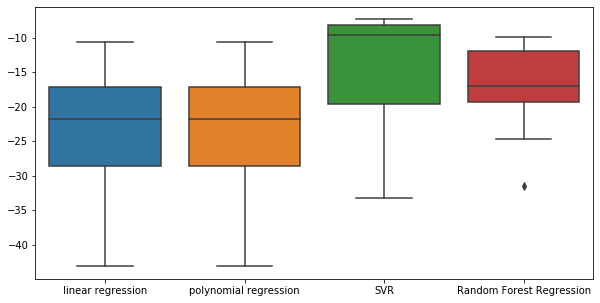

In [28]:
# Plotting accuracies of different regression models

acc_map = {}
acc_map['linear regression'] = acc
acc_map['polynomial regression'] = acc_poly
acc_map['SVR'] = acc_svr
acc_map['Random Forest Regression'] = acc_random
plt.figure(figsize = (10,5))
sns.boxplot(data = pd.DataFrame(acc_map))

We can see that SVR gives the best results followed by the Random Forest Regression model.